# 📊 Exercícios com Seaborn

Este notebook contém exercícios práticos para aprender visualização de dados com **Seaborn**.
Use `import seaborn as sns` e `import matplotlib.pyplot as plt` para os gráficos. Boa prática! 💪

---

### 🔽 Carregue o dataset `tips`
```python
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("tips")
```

---

**1.** Plote a relação entre `total_bill` e `tip` com `scatterplot`.

**2.** Mostre a média de gorjetas (`tip`) por dia da semana (`day`) com `barplot`.

**3.** Mostre a distribuição de valores de `total_bill` com `histplot` e `kde=True`.

**4.** Faça um `boxplot` de `total_bill` para cada categoria de `sex`.

**5.** Use `countplot` para ver quantas refeições foram feitas em cada dia da semana (`day`).

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1. Gráfico de dispersão (scatterplot)

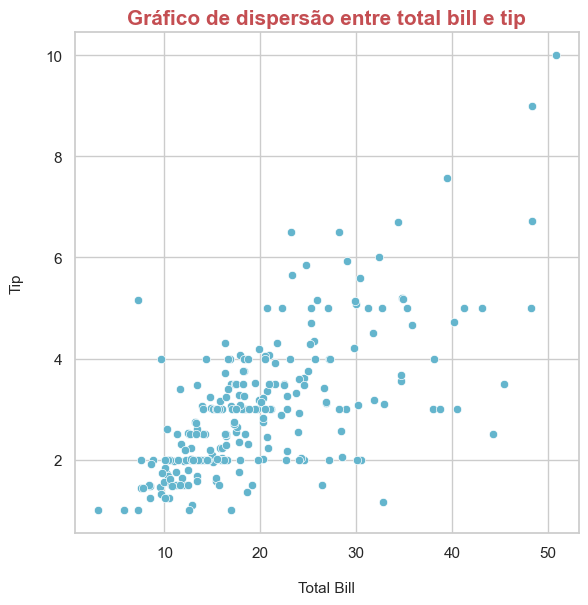

In [4]:
sns.set_theme(style='whitegrid')


fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='total_bill', y='tip', data=df, color='c')

ax.set_title('Gráfico de dispersão entre total bill e tip', fontsize=15, fontweight='bold', color='r')
ax.set_xlabel('Total Bill', fontsize=11, labelpad=15)
ax.set_ylabel('Tip', fontsize=11, labelpad=15)


plt.show()

#### 2. Gráfico de barras por categoria

In [5]:
g = df.groupby(by='day', observed=False)['tip'].mean().to_frame()
g

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


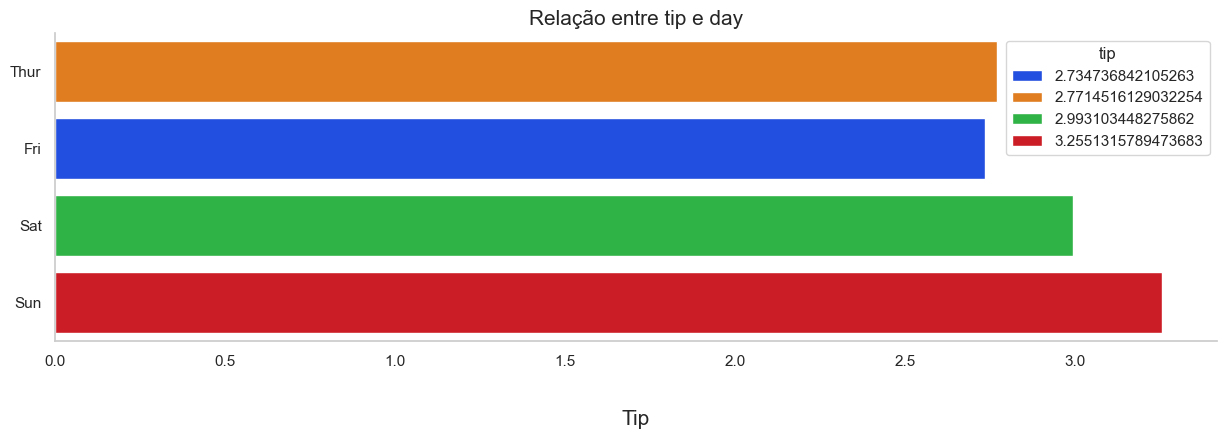

In [6]:
fig, ax = plt.subplots(1, figsize=(15, 4))

ax = sns.barplot(x='tip', y='day', data=g, hue='tip', palette='bright', legend='brief')
ax.set_title('Relação entre tip e day', fontsize=15)

ax.set_xlabel('Tip', fontsize=15, labelpad=30)
ax.set_ylabel('')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


ax.grid(False)
plt.show()

#### 3. Distribuição de valores (histograma + kde)

In [7]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


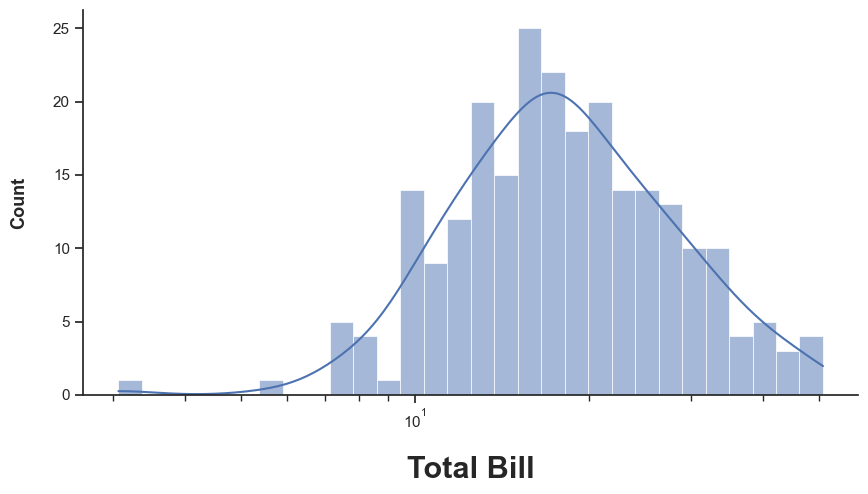

In [8]:
sns.set_theme(style='ticks')

fig, ax = plt.subplots(1, figsize=(10, 5))

ax = sns.histplot(
  data=df,
  x='total_bill',
  kde=True,
  linewidth=.5,
  log_scale=True,
  legend=True,
  bins=30,
)

ax.set_xlabel('Total Bill', fontsize=22, fontweight='bold', labelpad=18)
ax.set_ylabel('Count', fontsize=13, fontweight='bold', labelpad=18)

sns.despine(fig)
plt.show()

#### 4. Boxplot

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


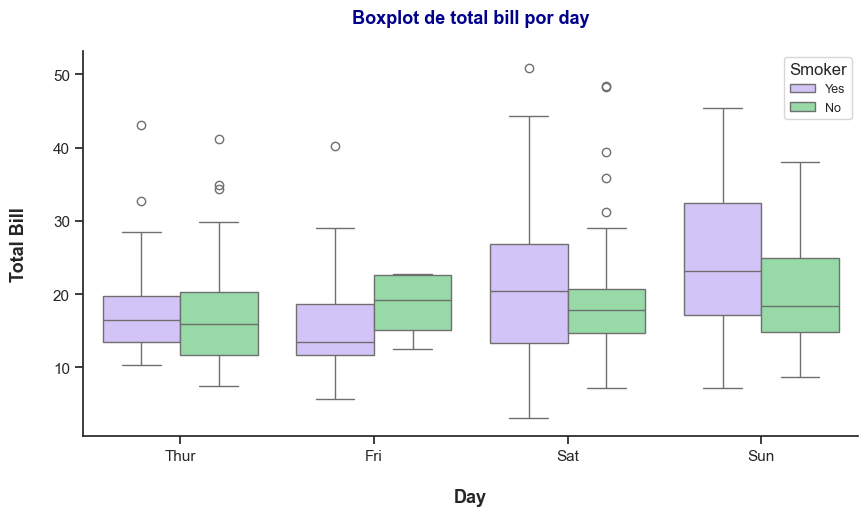

In [10]:
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(1, figsize=(10, 5))
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=df)

ax.set_xlabel('Day', fontsize=13, fontweight='bold', labelpad=18)
ax.set_ylabel('Total Bill', fontsize=13, fontweight='bold', labelpad=18)
ax.set_title('Boxplot de total bill por day', fontsize=13, fontweight='bold', color='darkblue', pad=20)
ax.legend(title='Smoker', loc='upper right', fontsize=9, title_fontsize=12)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.grid(False)

plt.show()

### 5. Contagem de categorias

/tmp/ipykernel_35898/1114602736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day', palette='bright')


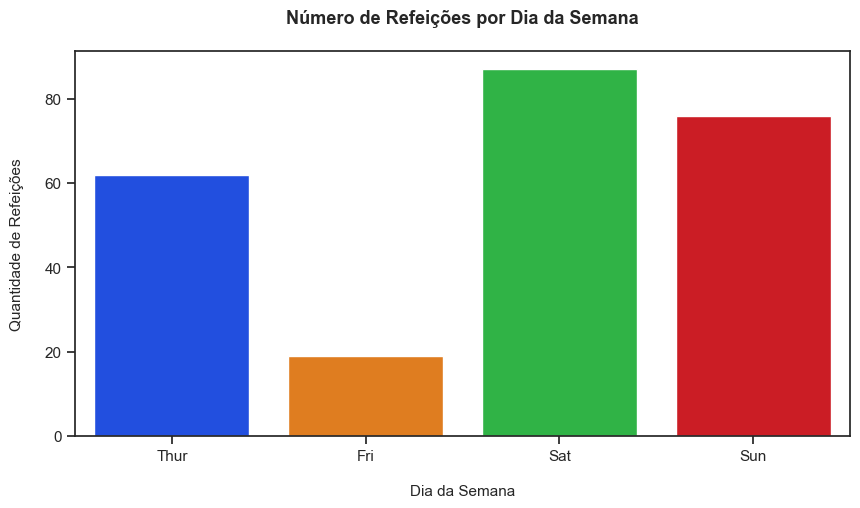

In [64]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day', palette='bright', hue='day')
plt.title('Número de Refeições por Dia da Semana', fontsize=13, fontweight='bold', pad=20)
plt.xlabel('Dia da Semana', fontsize=11, labelpad=15)
plt.ylabel('Quantidade de Refeições', fontsize=11, labelpad=15)
plt.xticks(rotation=0)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


plt.grid(False)
plt.show()